     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=e8a521598841905137d08c5e05b75c0f2c0976a7641a40cc6e24d69a1496ecd5
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


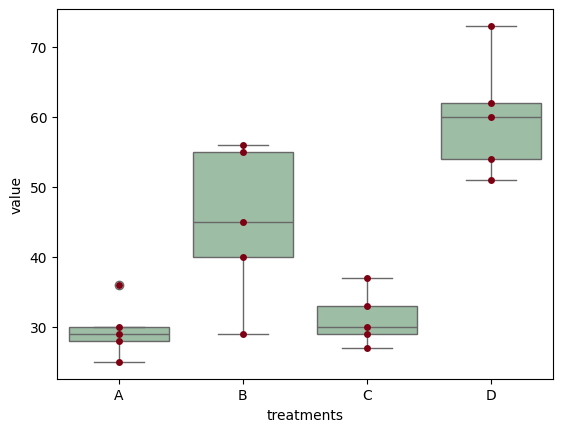

In [ ]:
#import stuff here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")

# reshape the d dataframe suitable for statsmodels package
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can
# easily detect the differences between different treatments
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [ ]:
#post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


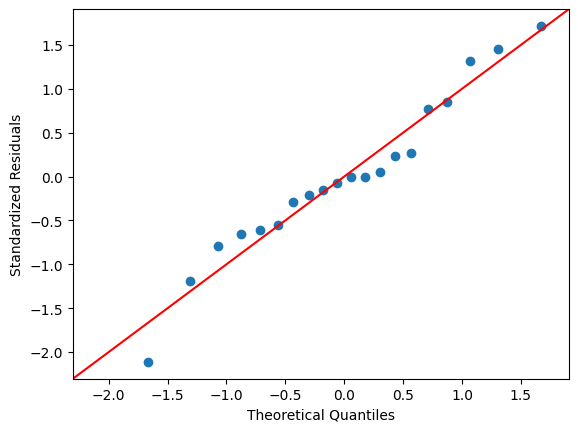

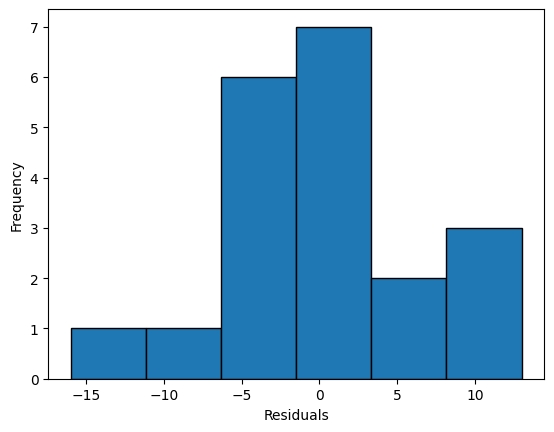

In [ ]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.9685018062591553 0.7229723930358887


In [ ]:
#assumption 2: variances are homoegenous: Bartlett's test when the sample is normally distributed
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'])
print(w, pvalue)

res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

5.687843565012841 0.1278253399753447


,Parameter,Value
0,Test statistics (T),5.6878
1,Degrees of freedom (Df),3.0000
2,p value,0.1278


In [ ]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.9220
1,Degrees of freedom (Df),3.0000
2,p value,0.1667


In [ ]:
#2 way anovas
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")

In [ ]:
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


<Axes: xlabel='Genotype', ylabel='value'>

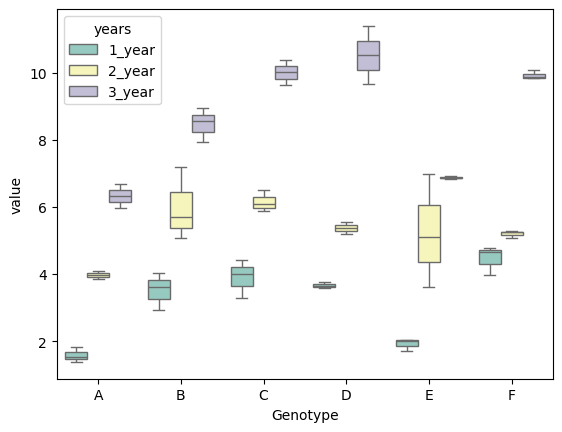

In [ ]:
sns.boxplot(x="Genotype", y="value", hue="years",data=d_melt, palette="Set3")

In [ ]:
model=ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


In [ ]:
res = stat()
res.anova_stat(df=d_melt, res_var='value', anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Genotype),5.0,58.551733,11.710347,32.748581,1.931655e-12
C(years),2.0,278.925633,139.462817,390.014868,4.006243e-25
C(Genotype):C(years),10.0,17.122967,1.712297,4.788525,2.230094e-04
Residual,36.0,12.873000,0.357583,NaN,NaN


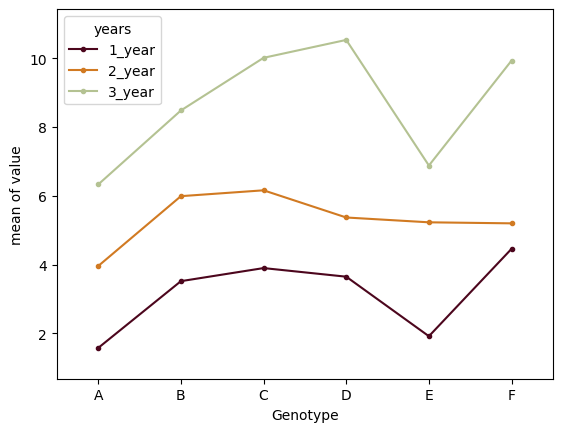

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=d_melt['Genotype'],trace=d_melt['years'],response=d_melt['value'],colors=['#4c061d','#d17a22','#b4c292'])
plt.show()

In [ ]:
res.tukey_hsd(df=d_melt, res_var='value',xfac_var='Genotype',anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,2.040000,1.191912,2.888088,10.234409,0.001000
1,A,C,2.733333,1.885245,3.581421,13.712771,0.001000
2,A,D,2.560000,1.711912,3.408088,12.843180,0.001000
3,A,E,0.720000,-0.128088,1.568088,3.612145,0.135306
4,A,F,2.573333,1.725245,3.421421,12.910072,0.001000
5,B,C,0.693333,-0.154755,1.541421,3.478361,0.163609
6,B,D,0.520000,-0.328088,1.368088,2.608771,0.453066
7,B,E,1.320000,0.471912,2.168088,6.622265,0.001000
8,B,F,0.533333,-0.314755,1.381421,2.675663,0.425189
9,C,D,0.173333,-0.674755,1.021421,0.869590,0.900000


In [ ]:
res.tukey_hsd(df=d_melt,res_var='value',xfac_var='years',anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1_year,2_year,2.146667,1.659513,2.633821,15.230432,0.001
1,1_year,3_year,5.521667,5.034513,6.008821,39.175794,0.001
2,2_year,3_year,3.375000,2.887846,3.862154,23.945361,0.001


In [ ]:
res.tukey_hsd(df=d_melt,res_var='value',xfac_var=['Genotype','years'], anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(A, 1_year)","(A, 2_year)",2.38,0.548861,4.211139,6.893646,0.002439
1,"(A, 1_year)","(A, 3_year)",4.75,2.918861,6.581139,13.758326,0.001000
2,"(A, 1_year)","(B, 1_year)",1.94,0.108861,3.771139,5.619190,0.028673
3,"(A, 1_year)","(B, 2_year)",4.41,2.578861,6.241139,12.773520,0.001000
4,"(A, 1_year)","(B, 3_year)",6.90,5.068861,8.731139,19.985779,0.001000


In [ ]:
import numpy as np

city = np.repeat(['City1','City2'],5)
store = np.tile(['store1','store2'],5)
sales=[10,20,20,50,30,10,5,4,12,4]


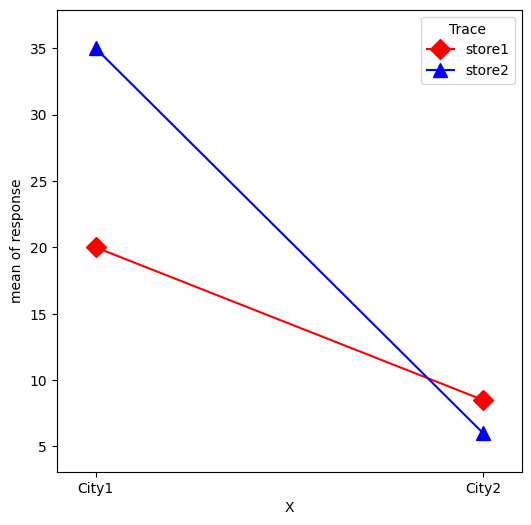

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(6,6))

fig = interaction_plot(x=city,trace=store,response=sales,colors=["red","blue"],markers=["D","^"],ms=10,ax=ax,)

